In [1]:
import pandas as pd

df_all = pd.read_csv('E:/석사 3기/DKSUS/data/yield_area_climate.csv')

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [3]:
df_all.drop(['year','country_y'], axis=1, inplace=True)

In [4]:
df_all.dropna(inplace=True)

In [5]:
df_all

,Area,Year,Area_Value,Yield_Value,country-code,soiltemp,surfacetempanomaly,precipitationflux
0,Afghanistan,1990.0,2584292.0,1712698.0,4.0,290.13530,288.10180,0.000012
1,Afghanistan,1991.0,2747650.0,1991833.0,4.0,290.76215,288.55664,0.000008
2,Afghanistan,1992.0,2643681.0,1978038.0,4.0,289.64380,287.67038,0.000016
3,Afghanistan,1993.0,3037267.0,1966873.0,4.0,289.80240,287.48715,0.000013
4,Afghanistan,1994.0,3163191.0,1977198.0,4.0,289.92834,287.52472,0.000011
...,...,...,...,...,...,...,...,...
5237,Zimbabwe,2011.0,3039757.0,3693818.0,716.0,303.22937,298.43110,0.000058
5238,Zimbabwe,2012.0,2942310.0,3787893.0,716.0,303.14017,298.17834,0.000060
5239,Zimbabwe,2013.0,2645701.0,3897701.0,716.0,302.55792,298.16350,0.000076
5240,Zimbabwe,2014.0,2295335.0,3925198.0,716.0,302.98870,297.99112,0.000070


In [6]:
df_all.Area_Value = np.log1p(df_all.Area_Value)
df_all.Yield_Value = np.log1p(df_all.Yield_Value)
df_all.soiltemp = np.log1p(df_all.soiltemp)
df_all.surfacetempanomaly = np.log1p(df_all.surfacetempanomaly)
df_all.precipitationflux = np.log1p(df_all.precipitationflux)

In [7]:
#features = df_all[['Area_Value','Yield_Value','soiltemp','surfacetempanomaly','precipitationflux']]
#features.index=df_all['Year']

In [8]:
#features.plot(subplots=True)
#plt.show()

# Model Fitting
#### https://www.statsmodels.org/dev/vector_ar.html

In [23]:
#dates = df_all['Year'].astype(int).astype(str)

In [24]:
#dates

0       1990
1       1991
2       1992
3       1993
4       1994
        ... 
5237    2011
5238    2012
5239    2013
5240    2014
5241    2015
Name: Year, Length: 2000, dtype: int32

In [26]:
#yearly = dates["Year"]
#from statsmodels.tsa.base.datetools import dates_from_str
#yearly = dates_from_str(yearly)
data = df_all[['Area_Value','Yield_Value','soiltemp','surfacetempanomaly','precipitationflux']]
#data.index = pd.DatetimeIndex(dates)
data = data.diff().dropna()

In [27]:
model = VAR(data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [46]:
results = model.fit(2)

In [47]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 05, Jun, 2022
Time:                     20:56:41
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -46.5674
Nobs:                     1997.00    HQIC:                  -46.6650
Log likelihood:           32538.4    FPE:                5.11754e-21
AIC:                     -46.7216    Det(Omega_mle):     4.97890e-21
--------------------------------------------------------------------
Results for equation Area_Value
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.000057         0.017467           -0.003           0.997
L1.Area_Value                 0.010862         0.026629            0.408           0.683
L1.Yield_Value         

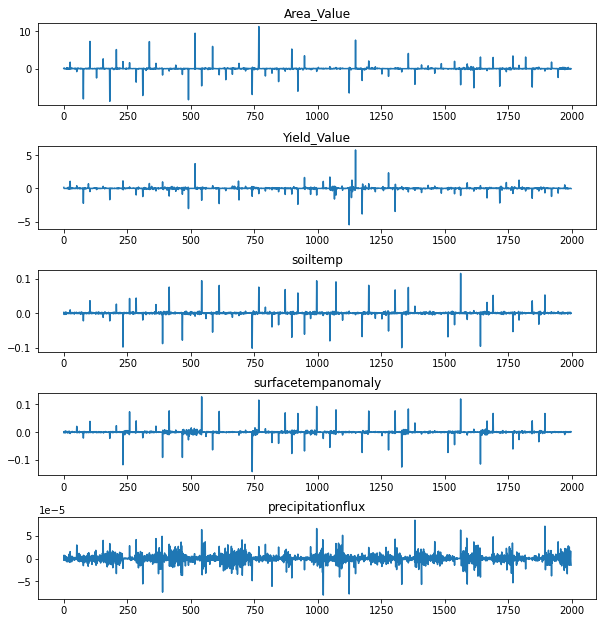

In [48]:
results.plot()
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

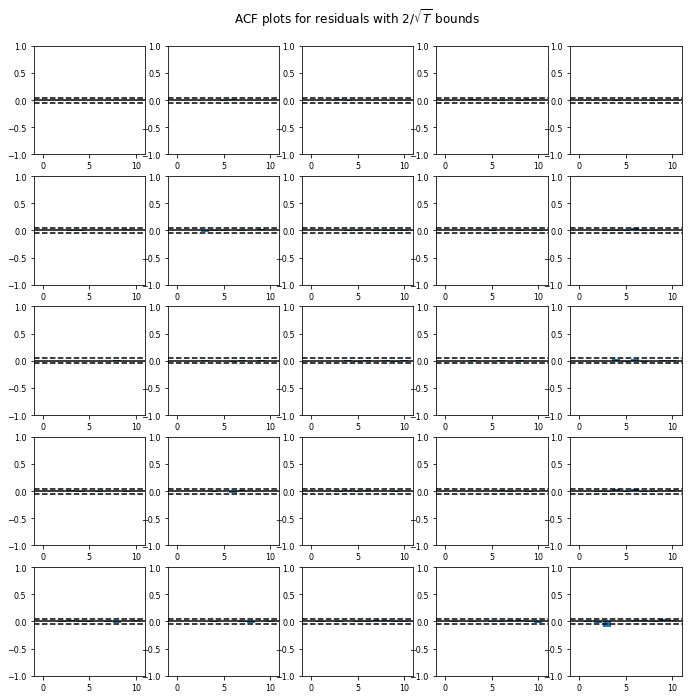

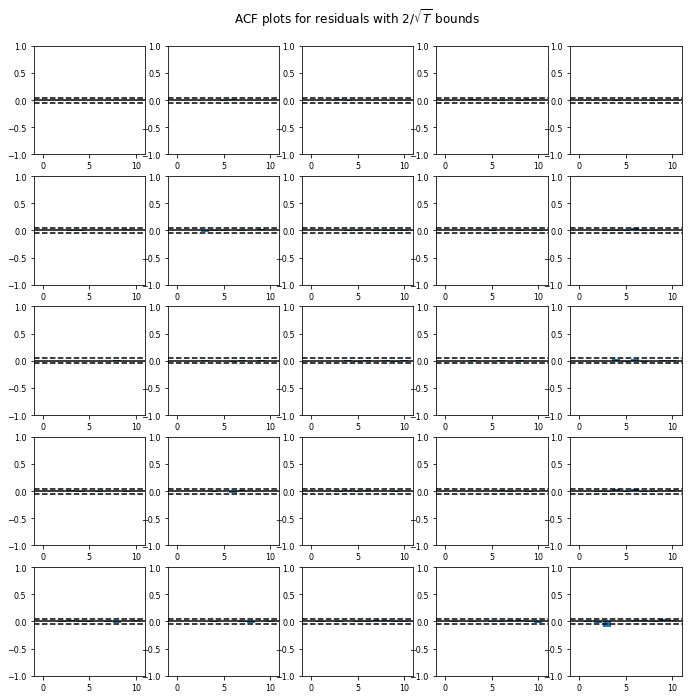

In [49]:
results.plot_acorr()

# Lag Order Selection

In [52]:
model.select_order(10)

In [53]:
results = model.fit(maxlags=15, ic='aic')

# Forecasting

In [54]:
lag_order = results.k_ar

In [55]:
results.forecast(data.values[-lag_order:],5)

array([[-1.65064604e-02, -4.39849282e-03, -8.97580754e-05,
        -5.36839109e-04,  4.47291473e-06],
       [-6.69431403e-03,  2.50851904e-03,  3.57624852e-04,
        -2.32603731e-04,  1.23506312e-06],
       [ 9.98686525e-03, -3.62906003e-03,  4.44504855e-04,
         1.07322334e-03,  1.47326256e-06],
       [ 2.84229801e-02,  1.17914771e-02, -7.61145018e-04,
        -9.42278434e-04, -9.15178884e-07],
       [-1.02619402e-02, -3.00667260e-03,  8.65478388e-05,
         4.77175723e-05, -4.83015058e-07]])

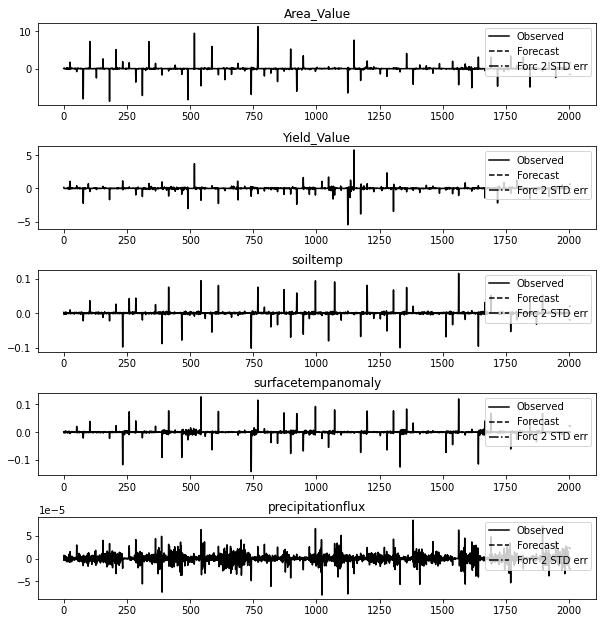

In [56]:
results.plot_forecast(10)

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

# Impulse Response Analysis

In [57]:
irf = results.irf(10)

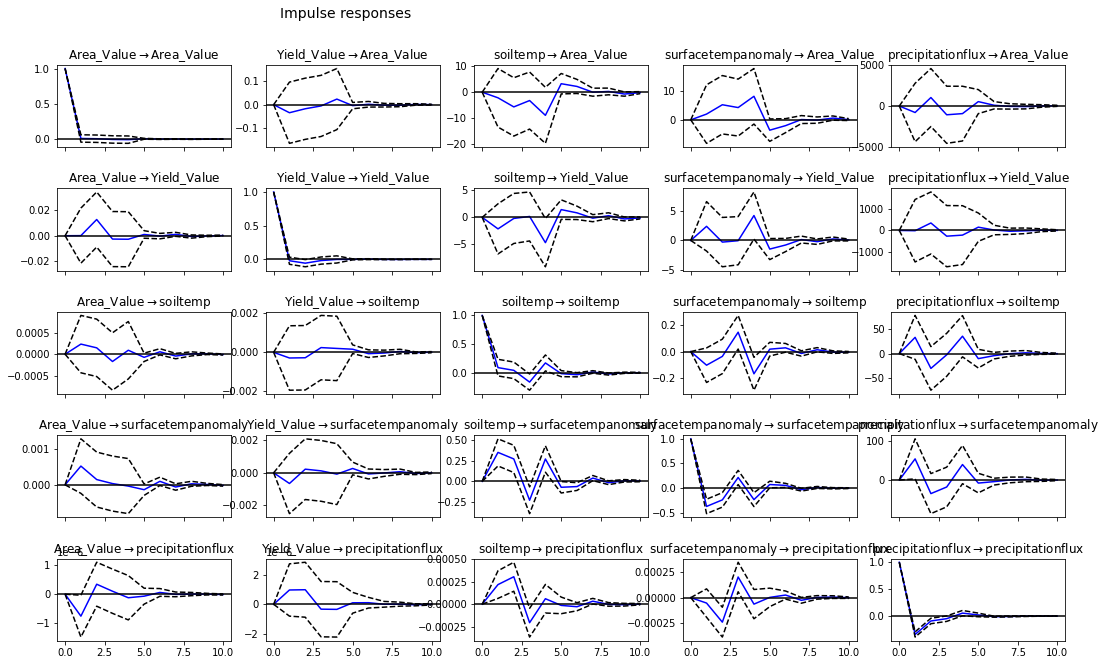

In [58]:
irf.plot(orth=False)

plt.subplots_adjust(left=0.1, bottom=0.1,  right=1.5, top=0.9, wspace=0.2, hspace=0.5)

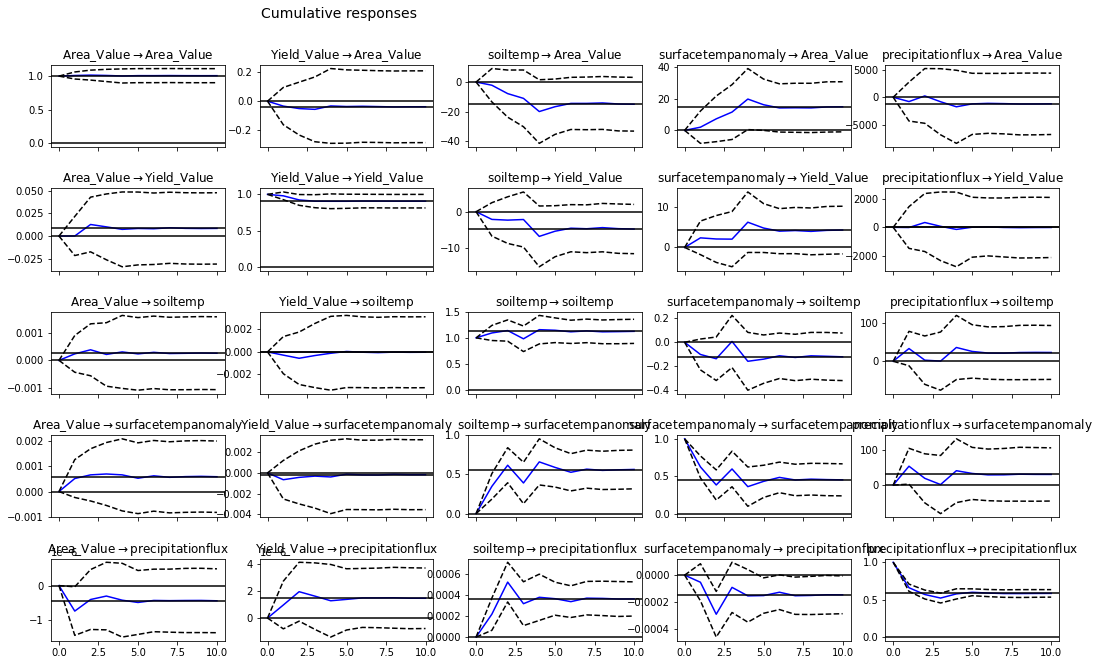

In [59]:
#Cumulative Responses
irf.plot_cum_effects(orth=False)
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1.5, top=0.9, wspace=0.2, hspace=0.5)